<a href="https://colab.research.google.com/github/echiyembekeza/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
import random
import numpy as np
import pandas as pd

df = pd.DataFrame({'a': np.arange(100000)})

In [4]:
%%timeit
df['b'] = df['a'].apply(lambda x: np.sin(x**2))

1 loop, best of 3: 178 ms per loop


In [0]:
%%timeit
df['b'] = np.sin(df['a']**2)

In [3]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [5]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = np.random.normal(420, 100)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = np.random.normal(200, 90)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=True, time_on_site=159.09963589932323, mobile=True), User(purchased=False, time_on_site=265.27863063991845, mobile=True), User(purchased=False, time_on_site=140.67350865284848, mobile=True), User(purchased=False, time_on_site=324.2637514994388, mobile=False), User(purchased=False, time_on_site=328.55762086890036, mobile=False), User(purchased=True, time_on_site=172.6129030223031, mobile=True), User(purchased=False, time_on_site=57.29907152033047, mobile=True), User(purchased=False, time_on_site=277.8519755602023, mobile=False), User(purchased=False, time_on_site=239.08486566418182, mobile=True), User(purchased=False, time_on_site=160.18459663496066, mobile=True)]


In [6]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

purchased  time_on_site  mobile
0       True    159.099636    True
1      False    265.278631    True
2      False    140.673509    True
3      False    324.263751   False
4      False    328.557621   False

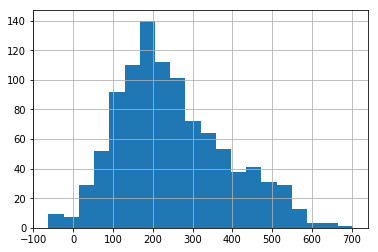

In [7]:
user_data['time_on_site'].hist(bins=20)

In [8]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site  -62.266832   -61.393897   -52.539179   -49.307407   -43.308569   \
purchased                                                                       
False                   1            1            1            1            1   
True                    0            0            0            0            0   

time_on_site  -34.868643   -27.688615   -26.654932   -26.483201   -21.868735   \
purchased                                                                       
False                   1            1            1            1            0   
True                    0            0            0            0            1   

time_on_site  ...   583.956481   586.662040   586.940891   590.262787  \
purchased     ...                                                       
False         ...            1            0            1            0   
True          ...            0            1            0            1   

time_on_site   616.803447   622.315831   637.042135   657.732766   664.661731  \
purchased                                                                       
False                   1            1            1            0            0   
True                    0            0            0            1            1   

time_on_site   702.933593  
purchased                  
False                   0  
True                    1  

[2 rows x 1000 columns]

In [0]:
user_data.loc[user_data['time_on_site'] < 0, 'time_on_site'] = np.NaN

In [10]:
user_data.isnull()

purchased  time_on_site  mobile
0        False         False   False
1        False         False   False
2        False         False   False
3        False         False   False
4        False         False   False
5        False         False   False
6        False         False   False
7        False         False   False
8        False         False   False
9        False         False   False
10       False         False   False
11       False         False   False
12       False         False   False
13       False         False   False
14       False         False   False
15       False         False   False
16       False         False   False
17       False         False   False
18       False         False   False
19       False         False   False
20       False         False   False
21       False         False   False
22       False         False   False
23       False         False   False
24       False         False   False
25       False         False   False
26       False         False   False
27       False         False   False
28       False         False   False
29       False         False   False
..         ...           ...     ...
970      False         False   False
971      False         False   False
972      False         False   False
973      False         False   False
974      False         False   False
975      False         False   False
976      False         False   False
977      False         False   False
978      False         False   False
979      False         False   False
980      False         False   False
981      False         False   False
982      False         False   False
983      False         False   False
984      False         False   False
985      False         False   False
986      False         False   False
987      False         False   False
988      False         False   False
989      False         False   False
990      False         False   False
991      False         False   False
992      False         False   False
993      False         False   False
994      False         False   False
995      False         False   False
996      False         False   False
997      False         False   False
998      False         False   False
999      False         False   False

[1000 rows x 3 columns]

In [11]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], bins=5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'])

purchased           False  True 
time_on_site                    
(0.612, 141.638]      128     75
(141.638, 281.962]    237    199
(281.962, 422.286]    104    109
(422.286, 562.61]      61     57
(562.61, 702.934]       8      9

In [12]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased              False     True 
time_on_site                          
(0.612, 141.638]    0.237918  0.167038
(141.638, 281.962]  0.440520  0.443207
(281.962, 422.286]  0.193309  0.242762
(422.286, 562.61]   0.113383  0.126949
(562.61, 702.934]   0.014870  0.020045

In [13]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile     False     True 
purchased                 
False      0.568  0.542667
True       0.432  0.457333

In [14]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['mobile'], user_data['purchased']], normalize='all')

mobile                 False               True           
purchased              False     True      False     True 
time_on_site                                              
(0.612, 141.638]    0.000000  0.000000  0.129686  0.075988
(141.638, 281.962]  0.012158  0.004053  0.227964  0.197568
(281.962, 422.286]  0.062817  0.041540  0.042553  0.068896
(422.286, 562.61]   0.060790  0.054711  0.001013  0.003040
(562.61, 702.934]   0.008105  0.009119  0.000000  0.000000

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [27]:
# TODO - your code here
# Use what we did live in lecture as an example
# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving persons.csv to persons (3).csv


In [30]:
import io
persons = pd.read_csv(io.BytesIO(uploaded['persons.csv']))
persons.head()

Unnamed: 0  age  weight  exercise_time
0           0   44     118            192
1           1   41     161             35
2           2   46     128            220
3           3   39     216             57
4           4   28     116            182

In [34]:
#Lets look at the variable types in the data
#We can use a pd function

persons.dtypes
#This shows that all of the columns contain integers

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object

In [41]:
#We need to drop a column, because it is not needed
persons.drop(columns='Unnamed: 0')

age  weight  exercise_time
0      44     118            192
1      41     161             35
2      46     128            220
3      39     216             57
4      28     116            182
5      58     103            165
6      55     161            107
7      21     188             37
8      55     216             79
9      50     127            267
10     21     160            228
11     43     102             78
12     73     209             44
13     27     165             48
14     21     169            171
15     36     131            194
16     49     171            191
17     69     172            147
18     18     122            271
19     55     157            111
20     19     218             28
21     34     143             24
22     20     116            267
23     20     159            241
24     32     117            181
25     71     103             21
26     21     164            229
27     79     189             38
28     72     149            110
29     26     117            279
...   ...     ...            ...
1170   22     199            102
1171   56     139            158
1172   27     111            252
1173   74     161            142
1174   30     137            244
1175   61     164             86
1176   57     213            103
1177   38     174            103
1178   67     150            118
1179   69     140            184
1180   34     124            147
1181   41     142             18
1182   49     160            256
1183   70     133            198
1184   57     210             27
1185   35     124             48
1186   61     170             30
1187   48     160            125
1188   71     129             21
1189   35     126            201
1190   70     156            104
1191   29     105            174
1192   51     122            194
1193   33     106            112
1194   64     122            184
1195   47     195              1
1196   29     210             22
1197   29     147             15
1198   25     149            185
1199   67     154             84

[1200 rows x 3 columns]

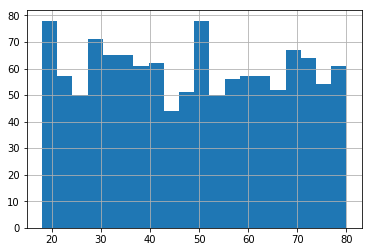

In [47]:
#let's start to look at the relationships between the variables
persons['age'].hist(bins=20)


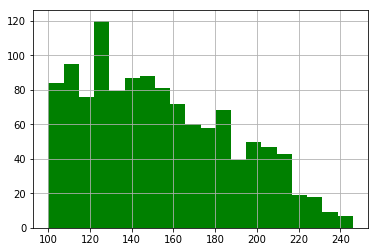

In [48]:
persons['weight'].hist(bins=20, color='g')

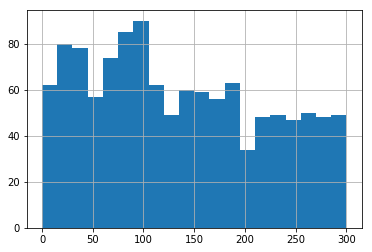

In [49]:
persons['exercise_time'].hist(bins=20)

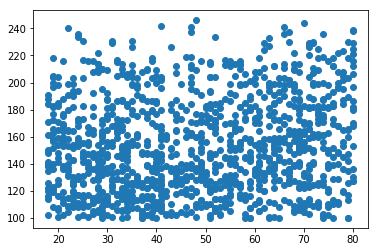

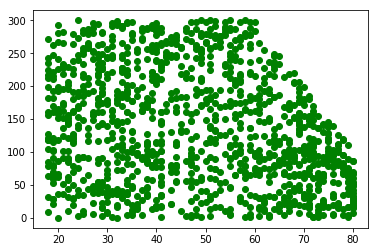

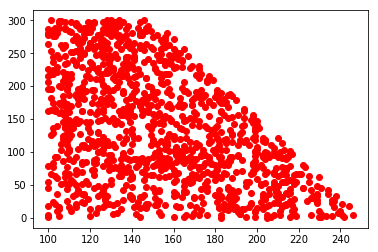

In [55]:
import matplotlib.pyplot as plt
x = persons['age']
y = persons['weight']
z = persons['exercise_time']
plt.scatter(x,y)
plt.show()
plt.scatter(x,z, color='g')
plt.show()
plt.scatter(y,z, color='r')
plt.show()




In [66]:
#lets create some bins to see if we can determine some relationships.

weight_bins = pd.cut(persons['weight'], bins=5)  # 5 equal-sized bins
age_bins = pd.cut(persons['age'], bins=10) #10 equal-sized bins
pd.crosstab(weight_bins, persons['age'], normalize='columns')

age                18        19        20        21        22        23  \
weight                                                                    
(99.854, 129.2]  0.35  0.173913  0.352941  0.277778  0.210526  0.428571   
(129.2, 158.4]   0.40  0.304348  0.235294  0.277778  0.473684  0.238095   
(158.4, 187.6]   0.15  0.260870  0.294118  0.333333  0.157895  0.095238   
(187.6, 216.8]   0.10  0.217391  0.117647  0.111111  0.105263  0.238095   
(216.8, 246.0]   0.00  0.043478  0.000000  0.000000  0.052632  0.000000   

age                    24        25        26      27  ...        71  \
weight                                                 ...             
(99.854, 129.2]  0.352941  0.368421  0.200000  0.3750  ...  0.296296   
(129.2, 158.4]   0.235294  0.368421  0.600000  0.1875  ...  0.185185   
(158.4, 187.6]   0.235294  0.105263  0.133333  0.2500  ...  0.296296   
(187.6, 216.8]   0.058824  0.052632  0.066667  0.1875  ...  0.074074   
(216.8, 246.0]   0.117647  0.105263  0.000000  0.0000  ...  0.148148   

age                    72        73    74        75      76        77  \
weight                                                                  
(99.854, 129.2]  0.111111  0.263158  0.25  0.277778  0.2500  0.230769   
(129.2, 158.4]   0.277778  0.000000  0.15  0.388889  0.1875  0.230769   
(158.4, 187.6]   0.166667  0.526316  0.40  0.166667  0.3125  0.153846   
(187.6, 216.8]   0.333333  0.105263  0.10  0.166667  0.1875  0.307692   
(216.8, 246.0]   0.111111  0.105263  0.10  0.000000  0.0625  0.076923   

age                    78        79        80  
weight                                         
(99.854, 129.2]  0.142857  0.333333  0.105263  
(129.2, 158.4]   0.285714  0.200000  0.157895  
(158.4, 187.6]   0.214286  0.200000  0.263158  
(187.6, 216.8]   0.285714  0.133333  0.210526  
(216.8, 246.0]   0.071429  0.133333  0.263158  

[5 rows x 63 columns]

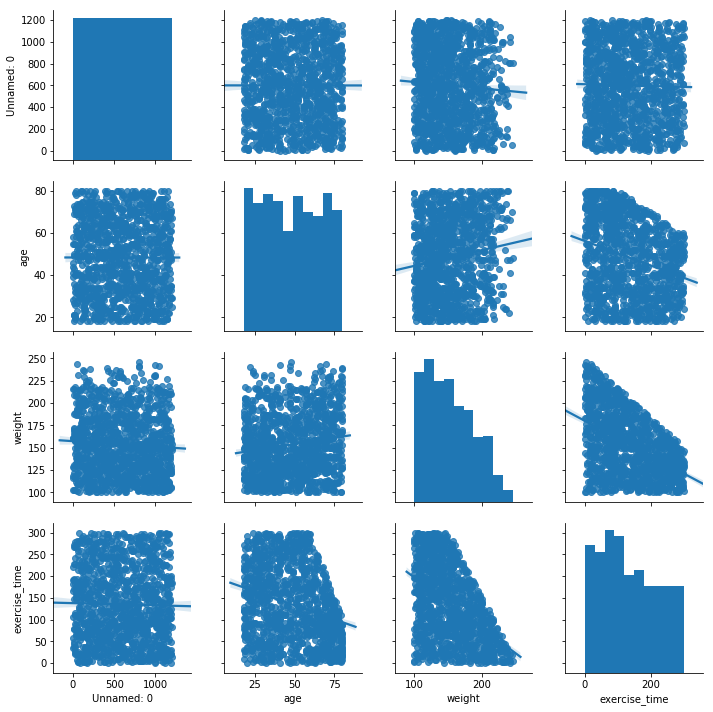

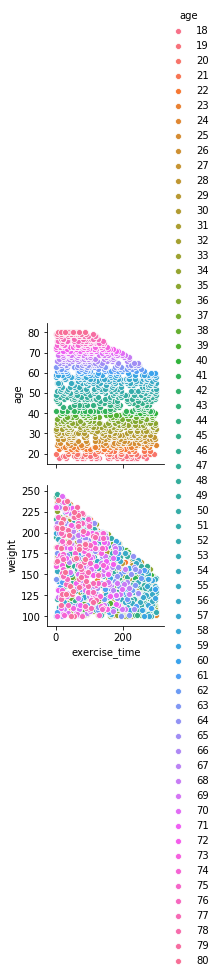

In [72]:
import seaborn as sns
sns.pairplot(persons, kind = 'reg')


pair_plot = sns.pairplot(persons, x_vars=['exercise_time'], y_vars=['age', 'weight'], hue='age')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

###The variables in the data are age, weight, and exercise time.
2.  What are the relationships between the variables?

###Upon first examination there looks to be no real relationship. But after performing pairplots, I found that there appears to be a correlation between exercise time and weight, exercise time and age, and a sleight relationship between age and weight.

3.  Which relationships are "real", and which spurious?
###I would have to say that the real relationships are the ones between age and weight and age and exercise time. However, we do not know if weight is increasing because of a decrease in exercise time or age...so these could be spurious.

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)